# LSTM 실습
LSTM(Long Short Term Memory)는 좀 더 긴 타임 스텝의 데이터를 처리하기 위해 고안되었다. gradient vanishing 문제를 극복하여 성공적으로 모델링 할 수 있다. 

앞 선 실습에서 SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 LSTM 순환 신경망을 만들 수 있다.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


# 훈련데이터 준비

* IMDB 데이터 사용 - Word Embedding은 단어 벡터의 크기를 임의로 조정하므로 사용되는 단어의 갯수에 크게 영향을 받지 않는다.

* 이 경우 사용되는 단어의 갯수를 1000으로 한다.

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)
print(x_train_all)
print('y')
print(y_train_all)
print(x_train_all.shape, y_train_all.shape)

[list([2, 2, 22, 2, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2, 2, 2, 22, 2, 2, 2, 469, 2, 22, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 2, 2, 22, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2, 2, 2, 480, 66, 2, 33, 2, 130, 2, 2, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 2, 215, 28, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 2, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 2, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 2, 38, 2, 88, 2, 2, 283, 2, 2, 2, 113, 103, 32, 2, 2, 2, 2, 178, 32])
 list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 2, 394, 20, 2, 119, 954, 189, 102, 2, 207, 110, 2, 21, 2, 69, 188, 2, 30, 23, 2

In [4]:
from tensorflow.keras.layers import Embedding

In [5]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])
print(x_train_all.shape, y_train_all.shape)

[22, 43, 530, 973, 65, 458, 66, 173, 36, 256, 25, 100, 43, 838, 112, 50, 670, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 546, 38, 447, 192, 50, 147, 22, 469, 22, 71, 87, 43, 530, 38, 76, 22, 515, 626, 62, 386, 316, 106, 480, 66, 33, 130, 38, 619, 25, 124, 51, 36, 135, 48, 25, 33, 22, 215, 28, 77, 52, 407, 82, 107, 117, 256, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 26, 141, 194, 226, 22, 21, 134, 476, 26, 480, 144, 30, 51, 36, 28, 224, 92, 25, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]
(25000,) (25000,)


In [6]:

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=123)

print(x_train.shape, x_val.shape)

(20000,) (5000,)


In [7]:
from tensorflow.keras.preprocessing import sequence

max_len = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=max_len)
x_val_seq = sequence.pad_sequences(x_val, maxlen=max_len)

print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


# 모형의 생성


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [9]:
model_lstm = Sequential()

####################
# TODO : 앞 선 실습에서 사용된 코드에서 SimpleRNN을 LSTM으로 변경하여 LSTM 모형을 생성하는
# 코드를 작성하여 보시오,
####################
vocab_size = 10000

model_lstm.add(Embedding(vocab_size, 100))  # one-hot encoding 대신에 Embedding을 사용
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 8)                 3488      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 1,003,497
Trainable params: 1,003,497
Non-trainable params: 0
_________________________________________________________________


# 모델 컴파일 & 훈련 

In [10]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                      validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 19s 28ms/step - loss: 0.4569 - accuracy: 0.7933 - val_loss: 0.3691 - val_accuracy: 0.8430
Epoch 2/10
625/625 [==============================] - 22s 36ms/step - loss: 0.3345 - accuracy: 0.8586 - val_loss: 0.3644 - val_accuracy: 0.8420
Epoch 3/10
625/625 [==============================] - 22s 35ms/step - loss: 0.3046 - accuracy: 0.8729 - val_loss: 0.3428 - val_accuracy: 0.8560
Epoch 4/10
625/625 [==============================] - 22s 36ms/step - loss: 0.2854 - accuracy: 0.8802 - val_loss: 0.3358 - val_accuracy: 0.8604
Epoch 5/10
625/625 [==============================] - 22s 36ms/step - loss: 0.2634 - accuracy: 0.8909 - val_loss: 0.3466 - val_accuracy: 0.8608
Epoch 6/10
625/625 [==============================] - 22s 35ms/step - loss: 0.2470 - accuracy: 0.8981 - val_loss: 0.3413 - val_accuracy: 0.8548
Epoch 7/10
625/625 [==============================] - 21s 34ms/step - loss: 0.2386 - accuracy: 0.9004 - val_loss: 0.3538 - val_accuracy:

# 모형 훈련 결과 시각화하기 

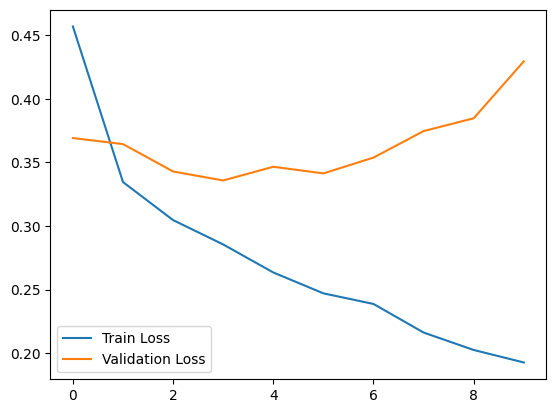

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

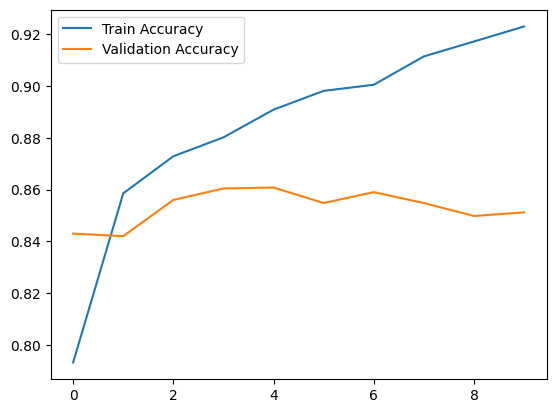

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# 모형의 평가

모형의 정확도 점수를 출력해 보면 SimpleRNN보다 성능이 향상 된 것을 확인할 수 있다.

In [13]:
loss, acc = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(acc)

0.8511999845504761
